# SLITD's e Convolução

## Introdução

Neste roteiro experimental vamos caracterizar os Sistemas Lineares Invariantes no Tempo Discreto e calcular a saída de um SLITD que esteja descrito pela **Resposta ao Impulso Unitário**, $h[n]$, para uma dada entrada $x[n]$.

## Fundamentação Teórica

Matematicamente, um sistema de tempo discreto (sistema discreto) é descrito por um operador $T\{\cdot\}$ que transforma uma sequência de valores de entrada $x[n]$ (sinal excitação) em uma sequência de valores de saída $y[n]$ (sinal resposta):

$$y[n] = T\{x[n]\}\;\;\;\;\;\;\;\;(1)$$

Em PDS, dizemos que o sistema processa o sinal de entrada, gerando o sinal de saída. 
<p>Sistemas discretos podem ser classificados em sistemas lineares e sistemas não lineares. Um sistema discreto caracterizado por $T\{\cdot\}$ será um operador linear se $T\{\cdot\}$ satisfizer o **princípio da superposição**:

$$T\{a_1.x_1[n]+a_2.x_2[n]\}=a_1.T\{x_1[n]\}+a_2.T\{x_2[n]\},\;\;\;\;\;\forall\;\; a_1, a_2, x_1[n], x_2[n]\;\;\;\;(2)$$

Qualquer sequência arbitrária $x[n]$ pode ser decomposta numa soma de impulsos unitários escalados em amplitude e deslocados no tempo:

$$x[n]=\sum_{k=-\infty}^\infty {x[k].\delta[n-k]}\;\;\;\;\;\;(3)$$

Usando as equações (2) e (3), a saída $y[n]$ de um SLITD gerada a partir de uma entrada arbitrária $x[n]$ é dada por:

$$y[n]=T\{\,x[n]\,\}=T\left\{\sum_{k=-\infty}^\infty {x[k].\delta[n-k]}\;\right\}=\sum_{k=-\infty}^\infty x[k].T\{\,\delta[n-k]\,\}\;\;\;\;(4)$$

A resposta $T\{\,\delta[n - k]\,\}$ pode ser interpretada como sendo a resposta de um sistema linear no tempo $n$ devido a um impulso unitário ocorrido no tempo $k$. Ela é chamada de **resposta impulsiva** e é denotada por $h_k[n]$. A saída completa é dada pela soma da *superposição* das infinitas respostas impulsivas:

$$y[n]=\sum_{k=-\infty}^\infty x[k].h_k[n]\;\;\;\;\;\;\;(5)$$

O cálculo da equação (5) requer o conhecimento da resposta impulsiva **variante** no tempo, $h_k[n]$, a qual na prática é muito difícil de ser obtida. Por isso, em nossos estudos, consideraremos apenas os sistemas de **tempo invariante**.

Um sistema linear no qual o par de sinais entrada-saída, $x[n]$ e $y[n]$, são invariantes a deslocamentos $k$ no tempo é chamado de **Sistema Linear Invariante no Tempo Discreto** (SLITD). Para um SLITD os operadores de transformação linear, $T\{\cdot\}$, e o deslocamento no tempo são intercambiáveis (veja figura seguinte):
 

<img src="img\fig1.png" alt="Operações intercambiáveis para os SLITDs" height=150 width=500>

A resposta impulsiva variante no tempo, $h_k[n]$, torna-se uma função invariante no tempo para um SLITD: $h[n-k]$, e portanto, a saída $y[n]$ do SLITD será dada por:

$$y[n]=\sum_{k=-\infty}^\infty x[k].h[n-k]\}\;\;\;\;\;\;\;(6)$$

A **Resposta Impulsiva** de um SLITD é dada por *h[n]*. A operação matemática definida pela equação (6) é chamada de *Soma de Convolução Linear* e é denotada por: $$y[n]\triangleq x[n]\ast h[n]$$

Um SLITD é completamente caracterizado no domínio do tempo por sua **Resposta ao Impulso**, $h[n]$:

<img src="img\fig2.png" alt="Operações intercambiáveis para os SLITDs" height=150 width=400>

A operação de **convolução** entre dois sinais pode ser calculada de vários modos. Se as sequências forem funções matemáticas (de duração finita ou infinita), pode-se avaliar analiticamente a equação (6) para todo $n$, obtendo-se uma equação (forma analítica) da saída do SLITD, $y[n]$. Mas se as sequências forem sinais discretos (amplitudes das amostras representadas valores numéricos) então a **convolução** pode ser calculada em tempo real por processadores digitais de sinais (DSP’s) via algoritmos específicos, como veremos a seguir.

### Exemplos

<ol><li>**Componentes simétricas dos sinais**: todo sinal pode ser decomposto em suas componentes de simetria **par** ("*even*", em inglês) e de simetria **ímpar** ("*odd*", em inglês).

$$x[n]=x_{par}[n]+x_{ímpar}[n]$$$\;\;\;\;\;\textrm{onde:}$

$$x_{par}[n]=\frac{x[n]+x[-n]}{2}\;\;\;\;\;\;\;\;\;\;\;\;x_{ímpar}[n]=\frac{x[n]-x[-n]}{2}$$

Vamos usar a função <span style="font-family:Courier New; font-size:1.em;">**[xe,xo,m] = evenodd(x,n)**</span> para decompor sinais discretos em suas componentes simétricas. <p>Vamos começar com o sinal *janela* ("*boxcar*", em inglês) deslocado: <span style="font-family:Courier New; font-size:1.em;">  x[n] = u[n] – u[n-3]</span>. 

Verifique graficamente o resultado da decomposição e comprove a recuperação do sinal original a partir da soma das componentes simétricas.

In [10]:
# -*- coding: utf-8 -*-
""" Funções de Apoio para decomposição de sinal em componentes simétricas (par e ímpar)
@author: Prof. Cláudio, Ago/2014.
"""
from numpy import arange, zeros, imag

def stepseq(n0=0, ne=-10, nd=10):
  """ Gera uma sequência Degrau Unitário deslocada de 'n0' amostras
    à direita, no intervalo de tempo de 'ne' a 'nd'
    -------------------------------------------------------------
    Uso:  u, n = stepseq(n0,ne,nd)
      u - vetor com as amplitudes do sinal degrau
      n - vetor com a base de tempo
  """
  n = arange(ne,nd+1)       # vetor para a base de tempo
  u = zeros(len(n))         # vetor com amplitudes do sinal degrau
  u[n >= n0] = 1.           # ajuste das amplitudes do sinal degrau
  return u, n

def evenodd(x,n):
  """ Decompõe o sinal 'x[n]' em suas componentes simétricas (par e ímpar)
    --------------------------------------------------------------------
    Uso:  xe,xo,m = evenodd(x,n)
      xe - vetor com as amplitudes da componente par
      xo - vetor com as amplitudes da componente ímpar
      m  - vetor com a base de tempo das duas componentes
  """
  if any(imag(x) != 0):
    print u'sinal x não é uma sequência real!'
    return 0,0,0
  m = -n[::-1]              # base de tempo rebatida em relação ao eixo vertical
  m1 = min([min(m),min(n)]) 
  m2 = max([max(m),max(n)])
  m = arange(m1,m2+1)       # nova base de tempo comum às duas componentes
  n1 = arange(0,len(n))
  x1 = zeros(len(m))
  nm = n[0]-m[0]            # distância entre as bases temporais em unid.s de tempo 
  x1[n1+nm] = x
  xe = 0.5*(x1 + x1[::-1])  # componente par
  xo = 0.5*(x1 - x1[::-1])  # componente ímpar
  return xe, xo, m

In [13]:
u1, n = stepseq(0,-5,5)     # sinal degrau
u2, n = stepseq(3,-5,5)     # sinal degrau deslocado de 4 amostras à direita (atrasado)
w = u1 - u2
[we,wo,m] = evenodd(w,n)    # componentes simétricas: par e ímpar
wr = we + wo                # sinal janela recuperado a partir das componentes simétricas

Populating the interactive namespace from numpy and matplotlib


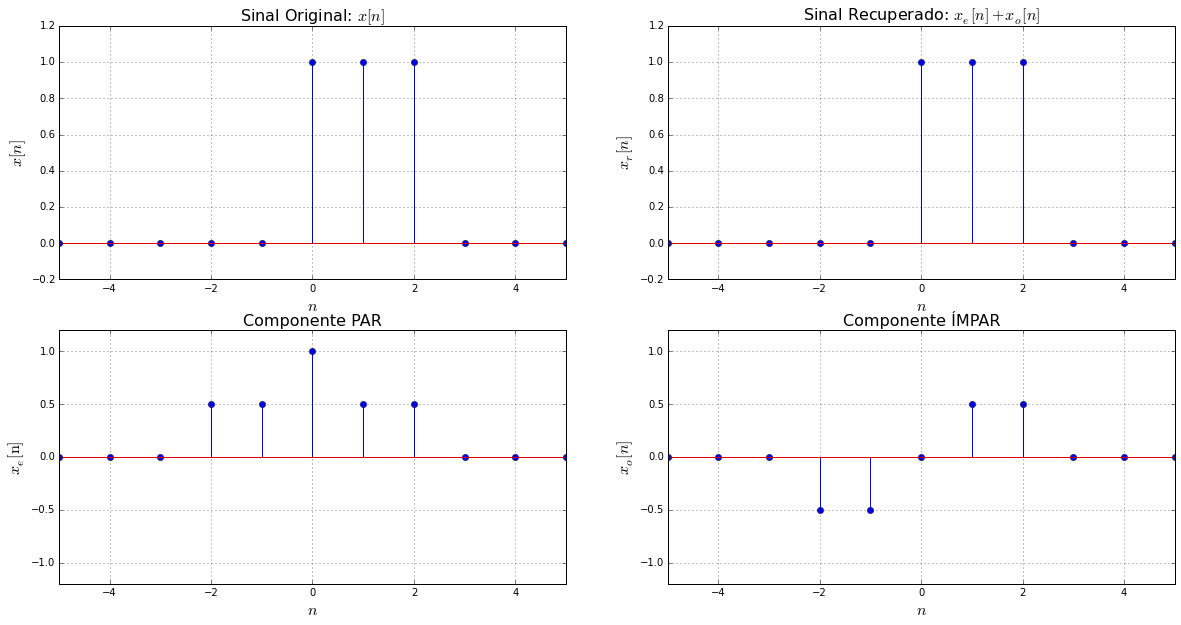

In [45]:
% pylab inline
from pylab import subplots, subplot, stem, title, xlabel, ylabel, axis, grid, tight_layout

# Gráficos dos sinais: Original 'w' e Recuperado 'wr'
subplots(figsize=(20,10))
subplot(2,2,1); stem(n,w); grid('on'); axis([-5, 5, -0.2, 1.2])
title(r'Sinal Original: $\itx\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16), ylabel(r'$\itx\rm[\itn\rm]$',fontsize=16)
 
subplot(2,2,2); stem(m,wr); grid('on'); axis([-5, 5, -0.2, 1.2])
title(r'Sinal Recuperado: $\itx_e\rm[\itn\rm] + \itx_o\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16), ylabel(r'$\itx_r\rm[\itn\rm]$',fontsize=16)

subplot(2,2,3); stem(m,we); grid('on'); axis([-5, 5, -1.2, 1.2])
title('Componente PAR',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\itx_e\rm[\it\rmn]$',fontsize=16)

subplot(2,2,4); stem(m,wo); grid('on'); axis([-5, 5, -1.2, 1.2])
title(u'Componente ÍMPAR',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\itx_o\rm[\itn\rm]$',fontsize=16)

<li value=2>**Convolução linear**: dada pelas equações (6) e (7).
Use a função *convolve()* do pacote *Scipy.signal* para convoluir dois sinais discretos (duas sequências discretas) de duração finita: <span style="font-family:Courier New; font-size:1.em;">**y = convolve(x,h)**</span>.
<p>A função *convolve()* supõem que as duas sequências iniciam-se na origem dos tempos, $n=0$. Use o *script* seguinte para convoluir e mostrar os gráficos das sequências: <span style="font-family:Courier New; font-size:1.em;">x[n] = {3, 2, 1, 0, -2, 4, 2} e h[n] = {3, 3, 0, -5, 1, 2}</span>.

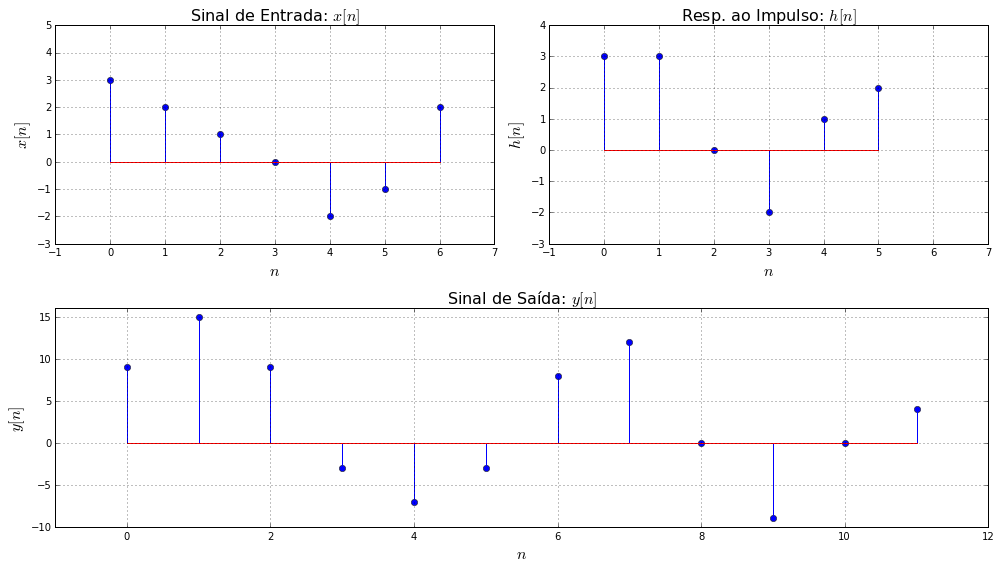

In [37]:
from scipy.signal import convolve

# Sinais discretos: x, h
x = array([3, 2, 1, 0, -2, -1, 2]); nx = arange(len(x))
h = array([3, 3, 0, -2, 1, 2]);     nh = arange(len(h))
y = convolve(x,h);                  ny = arange(len(y))

# gráficos
subplots(figsize=(14,8))

subplot(2,2,1), stem(nx,x,linewidth=3); axis([-1,7,-3,5])
title(r'Sinal de Entrada: $\itx\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\itx\rm[\itn\rm]$',fontsize=16); grid('on')

subplot(2,2,2), stem(nh,h); axis([-1,7,-3,4])
title(r'Resp. ao Impulso: $\ith\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\ith\rm[\itn\rm]$',fontsize=16); grid('on')

subplot(2,1,2), stem(ny,y); axis([-1,12,-10,16])
title(u'Sinal de Saída: ' + r'$\ity\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\ity\rm[\itn\rm]$',fontsize=16); grid('on')

tight_layout()

Use a função modificada <span style="font-family:Courier New; font-size:1.em;">[y,ny] = mconvolve(x,nx,h,nh)</span> para convoluir sequências que se iniciam em qualquer instante. Veja a seguir a convolução dos sinais <span style="font-family:Courier New; font-size:1.em;">[n] = {3, 2, 1, 0, -2, 4, 2} e h[n] = {3, 3, 0, -5, 1, 2}</span>.

In [30]:
def mconvolve(x,nx,h,nh):   
  """ Convolução modificada: retorna x * h com referência temporal
  ----------------------------------------------------------------
  Uso: y,ny = mconvolve(x,nx,h,nh)
    x,nx - sinal de entrada (ordenadas e abscissas)
    h,nh - sinal resposta ao impulso unitário (ordenadas e abscissas)
    y,ny - resultado da convolução (ordenadas e abscissas) """

  ninf = nx[0] + nh[0]      # índice temporal inferior do resultado
  nsup = nx[-1] + nh[-1]    # índice temporal superior do resultado
  ny = arange(ninf,nsup+1)  # base de tempo do resultado
  y = convolve(x,h)         # amplitudes do resultado
  return y, ny
 
# Sinais a serem convoluídos: x, h
x = array([3, 2, 1, 0, -2, 4, 2]); nx = arange(-3,4)
h = array([3, 3, 0, -5, 1, 2]);    nh = arange(-1,5)
y,ny = mconvolve(x,nx,h,nh)

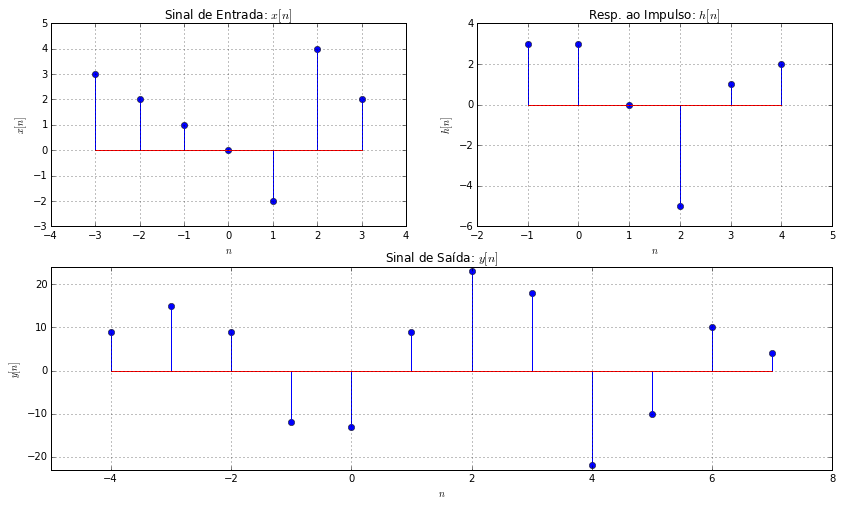

In [36]:
# Gráficos
subplots(figsize=(14,8))

subplot(2,2,1); stem(nx,x,linewidth=3); axis([min(nx)-1,max(nx)+1,-3,5])
title(r'Sinal de Entrada: $\itx\rm[\itn\rm]$')
xlabel(r'$\itn$'); ylabel(r'$\itx\rm[\itn\rm]$'); grid('on')

subplot(2,2,2); stem(nh,h); axis([min(nh)-1,max(nh)+1,-6,4])
title(r'Resp. ao Impulso: $\ith\rm[\itn\rm]$'),
xlabel(r'$\itn$'); ylabel(r'$\ith\rm[\itn\rm]$'); grid('on')

subplot(2,1,2); stem(ny,y); axis([min(ny)-1,max(ny)+1,min(y)-1,max(y)+1])
title(u'Sinal de Saída: ' + r'$\ity\rm[\itn\rm]$')
xlabel(r'$\itn$'); ylabel(r'$\ity\rm[\itn\rm]$'); grid('on')


## Procedimentos

<ol><li>Seja um trem de pulsos, $x[n] = u[n+2] – u[n–10]$, usado como sinal de entrada num SLITD descrito por sua **resposta impulsiva**, $h[n]=0,8^n.(u[n] – u[n–8])$. Determine a saída $y[n]$ do SLITD, e trace os sinais envolvidos (entrada, resposta impulsiva e saída) em planos cartesianos distintos.</li>
<p><li>Calcule manualmente a convolução das sequências $x[n]$ e $h[n]$, e em seguida verifique computacionalmente o resultado obtido manualmente, traçando os sinais envolvidos num único plano cartesiano. 
<p style="text-align:center"><span style="font-family:Courier New; font-size:1.em;">x[n] = [11, 7, 0, -1]   e   h[n] = [ 3, 0, -5, 2, 1]</span></p></li></ol>

## Exercícios

<ol><li>Crie um *script* para esboçar os seguintes sinais muma mesma figura (plano cartesiano), com $-10\leq n \leq 10$: 
<ol><li>$5.\delta[n]$</li><li>$5.u[n]$</li><li>$5.u[n-10]$</li><li>$0,5^nu[n]$</li><li>$3.sen(0,2\pi n)$</li><li>$0,5^n.sen(\pi n/10).u[n]$</li></ol>
<li>Plote os sinais $x[n] = n.u[n-6],\;\;y[n] = n.u[6-n]$ e a convolução deles, num mesmo plano cartesiano, com $-10\leq n \leq 10$.</li>
<li>Supondo um DSP com intervalo de amostragem de $T_s$ = 5,0 ms, converta para digital cada um dos seguintes sinais analógicos, quantizando-os com 4 bits para a faixa de amplitudes de -1,0 V a 1,0 V, e depois calcule e trace a convolução das sequências resultantes para $0\leq t\leq 1,$ s:
<ol><li>$h(t) = e^{-5t}u(t)$</li>
<li>$x(t) = 0,5.sen(20\pi t).u(t)$</li></ol>
Você pode usar a seguinte função para quantizar os sinais...

In [38]:
def quantize(sd,bits,fd):
    """ sd - sinal discreto (amplitude com valor de precisão infinita)
        bits - qtde de bits (quantidade de níveis de quantização: 2^bits)
        fd - faixa dinâmica: valor mínimo e valor máximo das amplitudes """
    val = linspace(fd[0],fd[1],2**bits)
    sq = zeros(len(sd))                  # vetor das amplitudes do sinal quantizado
    i = 0
    for amp in sd:
        sq[i] = val[abs(sd[i]-val).argmin()]
        i += 1
    return sq                            # sinal quantizado  

<ol><li value=4>Calcule manualmente a convolução de $x[n] = \{ -2, -2, -2, 1, 1 \}$ com $z[n] = \{ -1, 2,  1 \}$ usando os seguintes métodos de cálculo da convolução: intuitivo, gráfico, folha deslizante, matricial e definição.</li>
<p><li>Pesquise sobre **convolução circular** e discorra sobre as diferenças e aplicações de cada um dos tipos de convolução.</li>
<p><li>Pesquise sobre **correlação** estatística e em seguida desenvolva um *script* para traçar o gráfico da correlação dos sinais do exercício 2. Você percebe alguma relação dessa figura estatística com a operação convolução? Justifique.</li></ol>

By **Prof. Cláudio A. Fleury**, Mar/19.

## Apêndice

*String's Modifiers* (modificadores de texto):  a contra barra (\) precede todas as sequências de modificaçao de caracteres nos documentos TEX/LATEX.

<table style="width:100%"; background-color=#f1f1c1>
<caption>**Dica** - Editor de equações LaTex online: www.codecogs.com/latex/eqneditor.php
  <tr><th text-align=center>Sequência de caracteres TEX</th><th text-align=center>Efeito</th></tr>
  <tr><td>\bf</td><td>*bold face* (negrito)</td></tr>
  <tr><td>\it</td><td>*italics* (itálico)</td></tr>
  <tr><td>\rm</td><td>*restore normal font* (volta à fonte normal)</td></tr>
  <tr><td>_{índice}</td><td>sub-índice</td></tr>
  <tr><td>^{potência}</td><td>potenciação</td></tr>
  <tr><td>\pi, \mu, \alpha, \beta, \gamma</td><td>Letras grega:  $\pi\,\mu\,\alpha\,\beta\,\gamma$</td></tr>
  <tr><td>\\*color*{*colorname*}</td><td>cores básicas: *red, green, yellow, magenta, blue, black, white*</td></tr>
  <tr><td>\\*color*[rgb]{r g b}</td><td>Para especificar uma cor pela soma de cores primárias (RGB) com valores entre 0 e 1</td></tr>
</table> 

#### Exemplo 

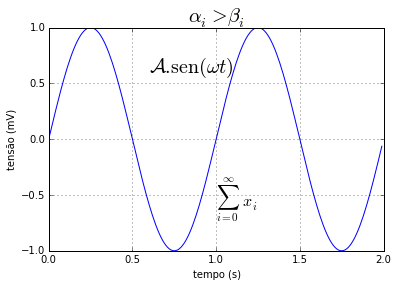

In [43]:
""" Senóide """
import numpy as np
import matplotlib.pylab as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s); plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty \,x_i$', fontsize=16)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{.sen}(\omega t)$', fontsize=20)
plt.xlabel('tempo (s)'); plt.ylabel(u'tensão (mV)'); plt.grid(True)